# Electrocardiograms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("data/electrocardiograms.csv")

In [3]:
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19560,1.000000,0.533333,0.049123,0.098246,0.108772,0.091228,0.101754,0.084211,0.105263,0.087719,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
19561,1.000000,0.564854,0.221757,0.202929,0.087866,0.000000,0.041841,0.150628,0.240586,0.290795,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
19562,0.991914,0.735849,0.215633,0.029650,0.061995,0.061995,0.016173,0.010782,0.021563,0.021563,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
19563,1.000000,0.839662,0.240506,0.215190,0.236287,0.198312,0.194093,0.143460,0.135021,0.071730,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19565 entries, 0 to 19564
Columns: 188 entries, x_1 to target
dtypes: float64(187), int64(1)
memory usage: 28.1 MB


In [5]:
X = df.drop(columns = "target")
y = df['target']

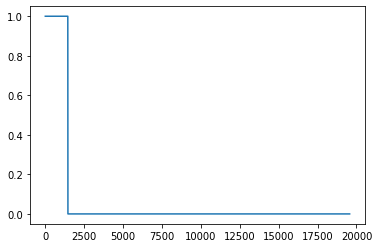

In [6]:
plt.plot(y)

In [7]:
at_risk_count = y[y == 1].sum()

In [8]:
healthy_count = y.shape[0] - at_risk_count

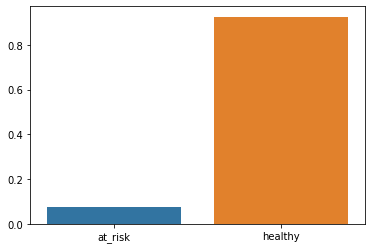

In [9]:
sns.barplot( x = ['at_risk', 'healthy'],
             y = [at_risk_count / df.target.count(), healthy_count / df.target.count()]);

Pretty unbalanced classes

#  Logistic Regression

Investigating the performance of a `LogisticRegression` using cross validation to evaluate the model on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_validate

model = LogisticRegression(max_iter=1000)

scoring = {'accuracy_score': 'accuracy', 'f1_score': 'f1',
           'recall_score': 'recall', 'precision_score': 'precision'}

predict = cross_validate(model, X, y, scoring = scoring)

In [11]:
predict

{'fit_time': array([3.44739342, 2.52204275, 2.68585896, 2.21071029, 2.86862183]),
 'score_time': array([0.02939153, 0.02088308, 0.04489708, 0.0232513 , 0.02261543]),
 'test_accuracy_score': array([0.93892154, 0.93892154, 0.93994378, 0.93841043, 0.93968822]),
 'test_f1_score': array([0.41849148, 0.46292135, 0.47191011, 0.44083527, 0.42995169]),
 'test_recall_score': array([0.29655172, 0.35517241, 0.36206897, 0.32871972, 0.30795848]),
 'test_precision_score': array([0.7107438 , 0.66451613, 0.67741935, 0.66901408, 0.712     ])}

In [12]:
correct_pred_ratio = predict['test_accuracy_score'].mean()
correct_pred_ratio

0.9391771019677997

In [13]:
flag_ratio = predict['test_recall_score'].mean()
flag_ratio

0.3300942608280635

In [14]:
correct_detection_ratio =  predict['test_precision_score'].mean()
correct_detection_ratio

0.6867386740061804

In [15]:
aggregated_metric = predict['test_f1_score'].mean()
aggregated_metric

0.44482198050033483

Due to the unbalance data set, it's visible how deceiving accuracy can be.

# Confusion Matrix

/home/rodrigo/.pyenv/versions/3.9.5/envs/Dados/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


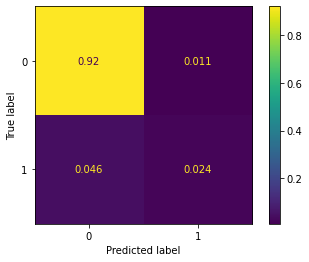

In [16]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test, normalize='all')
plt.show()

The confusion matrix should shows that the model is influenced by the class imbalance: it predicts heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a high accuracy. However, it causes it to miss out on many at risk heartbeats: it has a bad recall.

# KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()

predictKNN = cross_validate(modelKNN, X, y, scoring = scoring)

In [18]:
predictKNN

{'fit_time': array([0.02242255, 0.02496409, 0.0255959 , 0.01357794, 0.0140419 ]),
 'score_time': array([4.19402695, 3.07795787, 3.07345176, 2.99979138, 2.5962944 ]),
 'test_accuracy_score': array([0.98798876, 0.98441094, 0.98568873, 0.98543317, 0.98364426]),
 'test_f1_score': array([0.91500904, 0.8892922 , 0.90070922, 0.8972973 , 0.88278388]),
 'test_recall_score': array([0.87241379, 0.84482759, 0.87586207, 0.8615917 , 0.83391003]),
 'test_precision_score': array([0.96197719, 0.93869732, 0.9270073 , 0.93609023, 0.93774319])}

In [19]:
flag_ratio_KNN = predictKNN['test_recall_score'].mean()
flag_ratio_KNN

0.8577210356759336

In [20]:
if flag_ratio - flag_ratio_KNN > 0:
    best_model = 'LogisticRegression'
    ratio = flag_ratio
else:
    best_model = 'KNN'
    ratio = flag_ratio_KNN
    
best_model, ratio

('KNN', 0.8577210356759336)

The KNN classifier has a much higher recall than the LogisticRegression being better suited for the task.

# Classification Report

Now that we know the KNN model has the best recall, let's check out its performance accross all the other classification metrics.

In [21]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(modelKNN, X, y, cv=5)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18117
           1       0.94      0.86      0.90      1448

    accuracy                           0.99     19565
   macro avg       0.96      0.93      0.94     19565
weighted avg       0.99      0.99      0.99     19565



In [22]:
correct_atrisk_predictions = 0.93

# Feature engineering

Let's try some resampling strategies for imbalanced datasets

### Random over-sampling

In [23]:
df_train_over = pd.concat([X_train, y_train], axis = 1)
df_train_over

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
691,0.000000,0.037688,0.067839,0.085427,0.100503,0.125628,0.175879,0.218593,0.276382,0.346734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1070,0.982143,1.000000,0.991667,0.975000,0.972619,0.939286,0.832143,0.629762,0.372619,0.332143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5148,1.000000,0.632302,0.000000,0.017182,0.127148,0.127148,0.082474,0.075601,0.092784,0.085911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6616,1.000000,0.902597,0.660714,0.482143,0.430195,0.392857,0.324675,0.306818,0.324675,0.318182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11804,0.008197,0.196721,0.250000,0.377049,0.372951,0.385246,0.389344,0.393443,0.360656,0.377049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14305,0.910377,0.554245,0.318396,0.216981,0.115566,0.054245,0.009434,0.016509,0.011792,0.011792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9268,0.261168,0.000000,0.175258,0.305842,0.357388,0.371134,0.395189,0.405498,0.402062,0.395189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7132,1.000000,0.903587,0.087444,0.035874,0.136771,0.147982,0.139013,0.134529,0.125561,0.123318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12368,0.906122,0.289796,0.134694,0.355102,0.485714,0.555102,0.534694,0.518367,0.551020,0.563265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
df_class_0 = df_train_over[df_train_over['target'] == 0]
df_class_1 = df_train_over[df_train_over['target'] == 1]

Under-sampling might cause too much information loss, so let's jump straight to over-sampling the minority class


In [25]:
df_class_1_over = df_class_1.sample(df_class_0.target.count(), replace=True)

In [26]:
df_train = pd.concat([df_class_0, df_class_1_over], axis = 0)

In [27]:
df_train.target.value_counts()

0    12657
1    12657
Name: target, dtype: int64

In [28]:
X_train_over = df_train.drop(columns='target')
y_train_over = df_train['target']

Testing the models performance on the balanced dataset

In [29]:
modelKNN = KNeighborsClassifier()

modelKNN.fit(X_train_over, y_train_over)

y_pred_over = modelKNN.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5460
           1       0.82      0.90      0.86       410

    accuracy                           0.98      5870
   macro avg       0.91      0.94      0.92      5870
weighted avg       0.98      0.98      0.98      5870



In [30]:
modelLG = LogisticRegression(max_iter=1000)

modelLG.fit(X_train_over, y_train_over)

y_pred_over = modelLG.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      5460
           1       0.30      0.85      0.44       410

    accuracy                           0.85      5870
   macro avg       0.64      0.85      0.68      5870
weighted avg       0.94      0.85      0.88      5870



### Python imbalanced-learn

In [31]:
import imblearn

In [32]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
ros = RandomOverSampler()

df_ROS, y_ROS = ros.fit_resample(X_train, y_train)

In [34]:
y_ROS.value_counts()

1    12657
0    12657
Name: target, dtype: int64

In [35]:
modelKNN = KNeighborsClassifier()

modelKNN.fit(df_ROS, y_ROS)

y_pred_over = modelKNN.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5460
           1       0.82      0.90      0.86       410

    accuracy                           0.98      5870
   macro avg       0.91      0.94      0.92      5870
weighted avg       0.98      0.98      0.98      5870



In [36]:
modelLG = LogisticRegression(max_iter=1000)

modelLG.fit(df_ROS, y_ROS)

y_pred_over = modelLG.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      5460
           1       0.30      0.86      0.45       410

    accuracy                           0.85      5870
   macro avg       0.64      0.85      0.68      5870
weighted avg       0.94      0.85      0.88      5870



### Tomek Links

In [37]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

X_tl, y_tl = tl.fit_resample(X_train, y_train)

In [38]:
modelKNN = KNeighborsClassifier()

modelKNN.fit(X_tl, y_tl)

y_pred_over = modelKNN.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5460
           1       0.94      0.84      0.89       410

    accuracy                           0.99      5870
   macro avg       0.97      0.92      0.94      5870
weighted avg       0.98      0.99      0.98      5870



In [39]:
modelLG = LogisticRegression(max_iter=1000)

modelLG.fit(X_tl, y_tl)

y_pred_over = modelLG.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5460
           1       0.70      0.35      0.47       410

    accuracy                           0.94      5870
   macro avg       0.83      0.67      0.72      5870
weighted avg       0.94      0.94      0.94      5870



### SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [41]:
y_sm.value_counts()

1    12657
0    12657
Name: target, dtype: int64

In [42]:
modelKNN = KNeighborsClassifier()

modelKNN.fit(X_sm, y_sm)

y_pred_over = modelKNN.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5460
           1       0.78      0.92      0.84       410

    accuracy                           0.98      5870
   macro avg       0.89      0.95      0.91      5870
weighted avg       0.98      0.98      0.98      5870



In [43]:
modelLG = LogisticRegression(max_iter=1000)

modelLG.fit(X_sm, y_sm)

y_pred_over = modelLG.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      5460
           1       0.30      0.85      0.44       410

    accuracy                           0.85      5870
   macro avg       0.64      0.85      0.68      5870
weighted avg       0.94      0.85      0.88      5870



### SMOTE + Tomek Links together

In [44]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')

X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [45]:
modelKNN = KNeighborsClassifier()

modelKNN.fit(X_smt, y_smt)

y_pred_over = modelKNN.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5460
           1       0.78      0.93      0.84       410

    accuracy                           0.98      5870
   macro avg       0.88      0.95      0.92      5870
weighted avg       0.98      0.98      0.98      5870



Re-sampling techniques managed to improve model efficiency by 3% for KNN and more then 20% for the Logistic Regression model. It proves that a more balanced training dataset is vital to improving model performance.

# Ensemble methods and model tuning

In [46]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,\
                             RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score

In [48]:
modelXGB = XGBClassifier(use_label_encoder=False, eval_metric = 'auc')

modelXGB.fit(X_sm, y_sm)

y_pred_over = modelXGB.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5460
           1       0.93      0.93      0.93       410

    accuracy                           0.99      5870
   macro avg       0.96      0.96      0.96      5870
weighted avg       0.99      0.99      0.99      5870



In [49]:
modelBgg = BaggingClassifier()

modelBgg.fit(X_sm, y_sm)

y_pred_over = modelBgg.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5460
           1       0.87      0.89      0.88       410

    accuracy                           0.98      5870
   macro avg       0.93      0.94      0.94      5870
weighted avg       0.98      0.98      0.98      5870



In [52]:
estimators = [('knn', KNeighborsClassifier()),
              ('LgR', LogisticRegression(max_iter=1000)),
              ('bgg', BaggingClassifier()),
              ('xgb', XGBClassifier(use_label_encoder=False, eval_metric = 'auc')),
              ('gbc', GradientBoostingClassifier()),
              ('rdf', RandomForestClassifier())]

ensemble = VotingClassifier(
    estimators = estimators,
    voting = 'soft',
    weights = [1 for i in range(len(estimators))])

ensemble.fit(X_sm, y_sm)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('LR', LogisticRegression(max_iter=1000)),
                             ('bgg', BaggingClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            eval_metric='auc', gamma=None,
                                            gpu_id=None, importance_type=None,
                                            interaction_const...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_t

In [53]:
y_pred_over = ensemble.predict(X_test)

print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5460
           1       0.92      0.95      0.93       410

    accuracy                           0.99      5870
   macro avg       0.96      0.97      0.96      5870
weighted avg       0.99      0.99      0.99      5870



Using various ensemble methods can improve model recall 1% over the best model used so far.